# detecting flowers using resnet50

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## re loading model and freezing the top layer 

In [9]:
from keras.preprocessing import image
import numpy as np

# resnet50 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224


densenet_169=keras.applications.densenet.DenseNet169(include_top=True, 
                                        weights='imagenet', 
                                        input_tensor=None, 
                                        input_shape=None, 
                                        pooling=None, 
                                        classes=1000)


import pickle 
pickle_out = open(r"F:\pneumonia\000 P R O J E C T S\models\densenet_169.pickle" , 'wb')
pickle.dump ( densenet_169, pickle_out)
pickle_out.close()

# Let's print our layers again 
for (i,layer) in enumerate(densenet_169.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    

0 InputLayer False
1 ZeroPadding2D True
2 Conv2D True
3 BatchNormalization True
4 Activation True
5 ZeroPadding2D True
6 MaxPooling2D True
7 BatchNormalization True
8 Activation True
9 Conv2D True
10 BatchNormalization True
11 Activation True
12 Conv2D True
13 Concatenate True
14 BatchNormalization True
15 Activation True
16 Conv2D True
17 BatchNormalization True
18 Activation True
19 Conv2D True
20 Concatenate True
21 BatchNormalization True
22 Activation True
23 Conv2D True
24 BatchNormalization True
25 Activation True
26 Conv2D True
27 Concatenate True
28 BatchNormalization True
29 Activation True
30 Conv2D True
31 BatchNormalization True
32 Activation True
33 Conv2D True
34 Concatenate True
35 BatchNormalization True
36 Activation True
37 Conv2D True
38 BatchNormalization True
39 Activation True
40 Conv2D True
41 Concatenate True
42 BatchNormalization True
43 Activation True
44 Conv2D True
45 BatchNormalization True
46 Activation True
47 Conv2D True
48 Concatenate True
49 BatchNorm

In [10]:
## without fc top

In [12]:
# Re-loads the resnet50 model without the top or FC layers
densenet_169=keras.applications.densenet.DenseNet169(include_top=False, 
                                        weights='imagenet', 
                                        input_tensor=None, 
                                        input_shape=None, 
                                        pooling=None, 
                                        classes=1000)

# Layers are set to trainable as True by default
for layer in densenet_169.layers:
    layer.trainable = False
    
# Let's print our layers again 
for (i,layer) in enumerate(densenet_169.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    
    
# saving resnet50 model without fc layers
import pickle 
pickle_out = open(r"F:\pneumonia\000 P R O J E C T S\models\densenet_169_without_fc.pickle" , 'wb')
pickle.dump (densenet_169 , pickle_out)
pickle_out.close()

51879936/51877672 [==============================] - 1489s 29us/step
0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 BatchNormalization False
8 Activation False
9 Conv2D False
10 BatchNormalization False
11 Activation False
12 Conv2D False
13 Concatenate False
14 BatchNormalization False
15 Activation False
16 Conv2D False
17 BatchNormalization False
18 Activation False
19 Conv2D False
20 Concatenate False
21 BatchNormalization False
22 Activation False
23 Conv2D False
24 BatchNormalization False
25 Activation False
26 Conv2D False
27 Concatenate False
28 BatchNormalization False
29 Activation False
30 Conv2D False
31 BatchNormalization False
32 Activation False
33 Conv2D False
34 Concatenate False
35 BatchNormalization False
36 Activation False
37 Conv2D False
38 BatchNormalization False
39 Activation False
40 Conv2D False
41 Concatenate False
42 BatchNormalization False
43 Activation Fa

In [3]:
## Let's make a function that returns our FC Head

In [20]:
'''
#vgg16 top layer

def addTopModel(bottom_model, num_classes, D=32):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model
'''
#mobile net top layer 
def addTopModel(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    #top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model


In [5]:
## Let's add our FC Head back onto MobileNet

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 17

FC_Head = addTopModel(resnet_50, num_classes)

model = Model(inputs=resnet_50.input, outputs=FC_Head)

print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

## loading data 

In [22]:
# path 
train_data = r"F:\pneumonia\[FreeTutorials.Us] Udemy - Deep Learning Computer Vision\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\17_flowers\train"
test_data = r"F:\pneumonia\[FreeTutorials.Us] Udemy - Deep Learning Computer Vision\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\17_flowers\validation"


## data augmentation
batch_size = 10
# what we want 
'''
train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
'''
# resnet required preprocessing
train_datagen = ImageDataGenerator(dtype='float32',
                                   preprocessing_function=preprocess_input)


validation_datagen = ImageDataGenerator(dtype='float32',
                                        preprocessing_function=preprocess_input)
# applying on the data 
train_generator = train_datagen.flow_from_directory(
        train_data,
        #color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        test_data,
        #color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


## call back, checkponts and training

In [29]:
from keras import optimizers
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\resnet_flower_01.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

nb_train_samples = 1190
nb_validation_samples = 170
epochs = 25
batch_size = 32

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

import pickle 
pickle_out = open(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\checkpoint_resnet.pickle" , 'wb')
pickle.dump (checkpoint , pickle_out)
pickle_out.close()

Epoch 1/25
37/37 [==============================] - 57s 2s/step - loss: 0.2056 - accuracy: 0.9351 - val_loss: 1.0093 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 1.00929, saving model to F:\pneumonia\000 P R O J E C T S\codes\flowers\resnet_flower_01.h5
Epoch 2/25
37/37 [==============================] - 52s 1s/step - loss: 0.2477 - accuracy: 0.9351 - val_loss: 2.3579 - val_accuracy: 0.7029

Epoch 00002: val_loss did not improve from 1.00929
Epoch 3/25
37/37 [==============================] - 54s 1s/step - loss: 0.2082 - accuracy: 0.9486 - val_loss: 0.6601 - val_accuracy: 0.7319

Epoch 00003: val_loss improved from 1.00929 to 0.66007, saving model to F:\pneumonia\000 P R O J E C T S\codes\flowers\resnet_flower_01.h5
Epoch 4/25
37/37 [==============================] - 54s 1s/step - loss: 0.1588 - accuracy: 0.9432 - val_loss: 1.8121 - val_accuracy: 0.7464

Epoch 00004: val_loss did not improve from 0.66007
Epoch 5/25
37/37 [==============================] - 55s 1s/s

In [90]:
#confusion matrix

Found 170 images belonging to 17 classes.
Confusion Matrix
[[ 7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  6  0  1  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  0  0  0  3  0  1  0  0  0  5]
 [ 0  1  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]
Classification Report


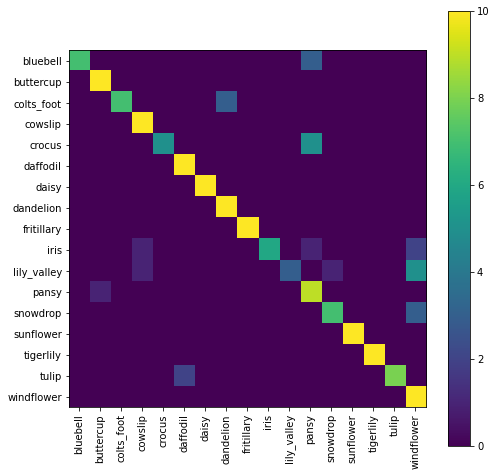

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
import pickle 


# loading model
pickle_in = open(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\checkpoint_resnet.pickle" , 'rb')
model = pickle.load (pickle_in)

img_row, img_height, img_depth = 224,224,3
model = load_model(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\resnet_flower_01.h5")

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        test_data,
        #color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#nb_train_samples = 2000
#nb_validation_samples = 1000


#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [39]:
## curves 

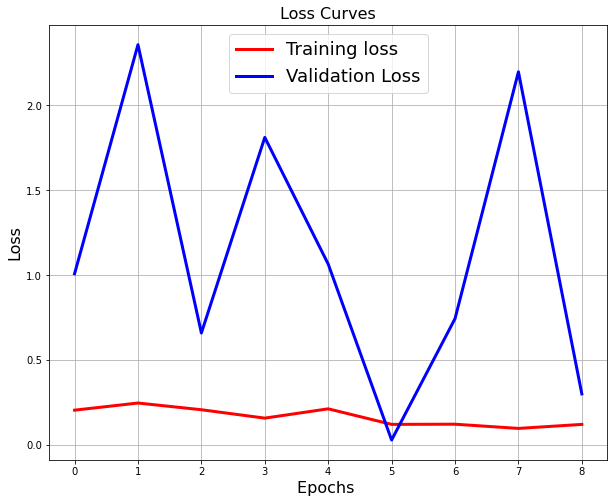

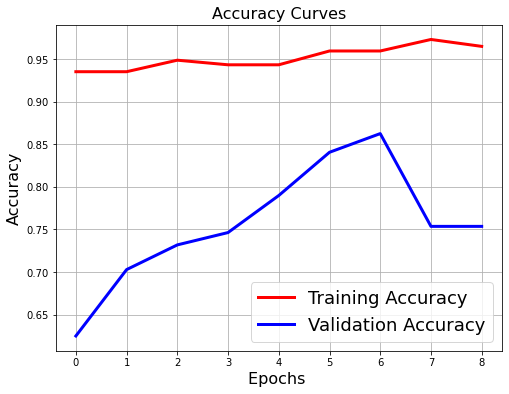

In [41]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);

In [92]:
# test

In [21]:
#loading model and getting class labels

In [90]:
from keras.models import load_model
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
import pickle 


pickle_in = open(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\checkpoint_resnet.pickle" , 'rb')
model = pickle.load (pickle_in)

img_row, img_height, img_depth = 224,224,3
model = load_model(r"F:\pneumonia\000 P R O J E C T S\codes\flowers\resnet_flower_01.h5")

test_data = r"F:\pneumonia\[FreeTutorials.Us] Udemy - Deep Learning Computer Vision\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\17_flowers\validation"

## getting our class labels 
validation_datagen = ImageDataGenerator(dtype='float32',
                                        preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)



Found 170 images belonging to 17 classes.
{0: 'bluebell', 1: 'buttercup', 2: 'colts_foot', 3: 'cowslip', 4: 'crocus', 5: 'daffodil', 6: 'daisy', 7: 'dandelion', 8: 'fritillary', 9: 'iris', 10: 'lily_valley', 11: 'pansy', 12: 'snowdrop', 13: 'sunflower', 14: 'tigerlily', 15: 'tulip', 16: 'windflower'}


In [122]:
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re


def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 224, 224


files = []
predictions = []
true_labels = []
# predicting images

test_data = r"F:\pneumonia\[FreeTutorials.Us] Udemy - Deep Learning Computer Vision\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\17_flowers\validation\\"


for i in range(0, 10):
    path = test_data 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    #x = x /255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    predict = model.predict(images)
    classes = np.argmax(predict , axis=1)
    #classes = model.predict(images, batch_size = 10)
    predictions.append(classes)
    #print(classes)

for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=1, fy=1, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)
    
cv2.destroyAllWindows()